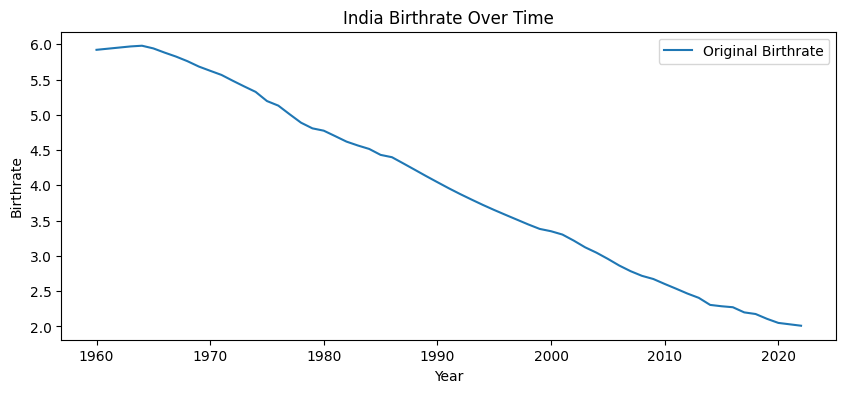

C:\Users\22150\mynewenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - loss: 0.5066 - val_loss: 1.0486
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2092 - val_loss: 0.5185
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0670 - val_loss: 0.1820
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0566 - val_loss: 0.0750
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0100 - val_loss: 0.0133
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0082 - val_loss: 0.0044
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0071 - val_loss: 0.0102
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0077 - val_loss: 0.0012
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0035 - val_loss: 0.0184
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0033 - val_loss: 0.0265
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0034 - val_loss: 0.0178
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0030 - val_l

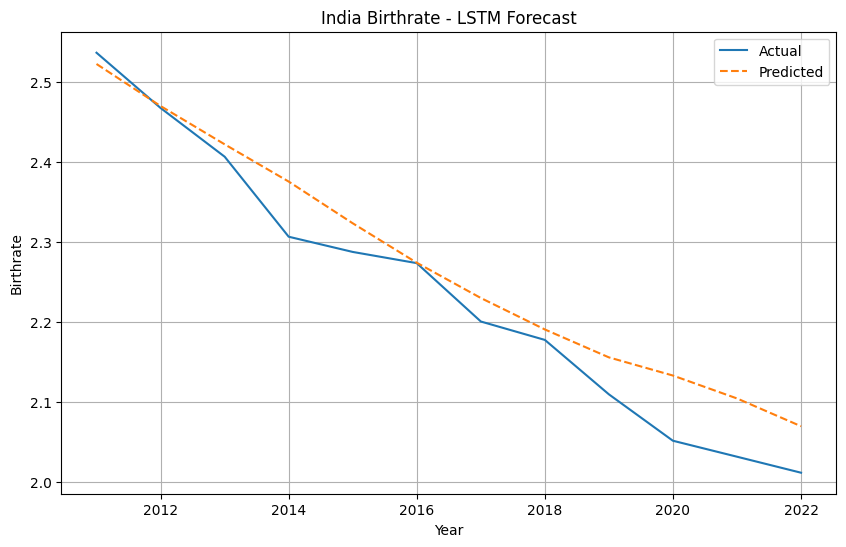

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
Step 1 Prediction (scaled): -1.4957571029663086
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Step 2 Prediction (scaled): -1.5145033597946167
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Step 3 Prediction (scaled): -1.532414197921753
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Step 4 Prediction (scaled): -1.542252779006958
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Step 5 Prediction (scaled): -1.544987678527832


C:\Users\22150\AppData\Local\Temp\ipykernel_13092\1384166573.py:113: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=ts.index[-1] + pd.DateOffset(years=1), periods=5, freq='Y')


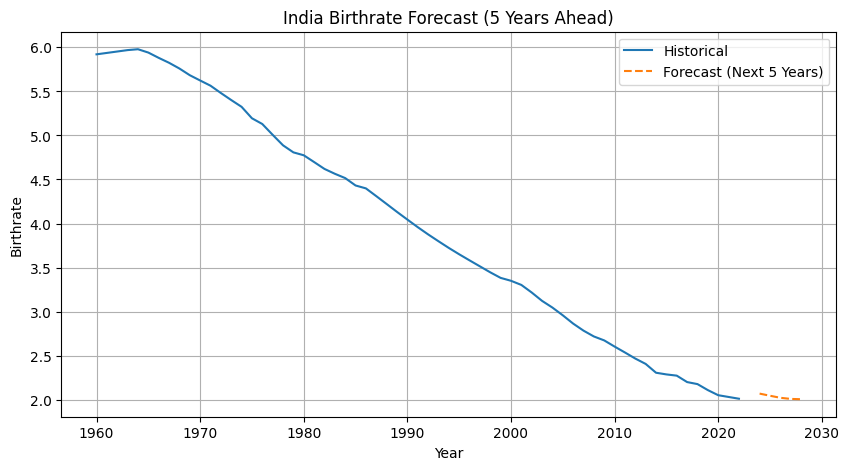

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# Load data
file_path = r"C:\Users\22150\Downloads\Birthrate.csv"
df = pd.read_csv(file_path, skiprows=4)

# Filter for India
country = 'India'
country_df = df[df['Country Name'] == country]

# Extract year columns (columns that are digits)
year_columns = [col for col in country_df.columns if col.isdigit()]
ts = country_df[year_columns].T
ts.columns = ['Birthrate']
ts.index = pd.to_datetime(ts.index, format='%Y')

# Ensure the 'Birthrate' column is numeric and drop NaNs
ts['Birthrate'] = pd.to_numeric(ts['Birthrate'], errors='coerce')
ts = ts.dropna()

# Plot original data
plt.figure(figsize=(10, 4))
plt.plot(ts, label='Original Birthrate')
plt.title(f'{country} Birthrate Over Time')
plt.xlabel('Year')
plt.ylabel('Birthrate')
plt.legend()
plt.show()

# Normalize the data
scaler = StandardScaler()
ts_scaled = scaler.fit_transform(ts['Birthrate'].values.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 5
X, y = create_sequences(ts_scaled, seq_length)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print(f"Train Loss: {train_loss}")
print(f"Test Loss: {test_loss}")

# Predictions
predictions = model.predict(X_test)
predictions_actual = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
years = ts.index[seq_length + len(X_train):]
plt.figure(figsize=(10, 6))
plt.plot(years, y_test_actual, label='Actual')
plt.plot(years, predictions_actual, label='Predicted', linestyle='--')
plt.title(f'{country} Birthrate - LSTM Forecast')
plt.xlabel('Year')
plt.ylabel('Birthrate')
plt.legend()
plt.grid(True)
plt.show()

# Forecast future values
def forecast_future(model, input_data, scaler, n_steps=5):
    future_predictions = []
    current_input = input_data[-1].reshape(1, seq_length, 1)

    for i in range(n_steps):
        prediction = model.predict(current_input)
        print(f"Step {i+1} Prediction (scaled): {prediction[0, 0]}")
        future_predictions.append(prediction[0, 0])
        current_input = np.append(current_input[0, 1:], prediction).reshape(1, seq_length, 1)

    return scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Predict future 5 years
future_preds = forecast_future(model, X_test, scaler, n_steps=5)

# Plot future predictions
future_years = pd.date_range(start=ts.index[-1] + pd.DateOffset(years=1), periods=5, freq='Y')
plt.figure(figsize=(10, 5))
plt.plot(ts.index, ts['Birthrate'], label='Historical')
plt.plot(future_years, future_preds, label='Forecast (Next 5 Years)', linestyle='--')
plt.title(f'{country} Birthrate Forecast (5 Years Ahead)')
plt.xlabel('Year')
plt.ylabel('Birthrate')
plt.legend()
plt.grid(True)
plt.show()
